<a href="https://colab.research.google.com/github/Rizwanali324/Deep_learning_images_Classification/blob/main/vagetable_img_clasification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install kaggle


In [ ]:
from google.colab import files

# Upload the Kaggle API key file
uploaded = files.upload()


Saving kaggle.json to kaggle.json


In [ ]:
import os

# Create the Kaggle directory
!mkdir -p ~/.kaggle

# Move the Kaggle API key to the Kaggle directory
!mv kaggle.json ~/.kaggle/


In [ ]:
# Set permissions for the Kaggle API key file
!chmod 600 ~/.kaggle/kaggle.json


In [ ]:
!kaggle datasets download -d misrakahmed/vegetable-image-dataset

100% 533M/534M [00:04<00:00, 139MB/s]
100% 534M/534M [00:04<00:00, 135MB/s]


In [ ]:
# Step 5: Unzip the downloaded dataset
!unzip vegetable-image-dataset.zip

Streaming output truncated to the last 5000 lines.
  inflating: Vegetable Images/train/Radish/0001.jpg  
  inflating: Vegetable Images/train/Radish/0002.jpg  
  inflating: Vegetable Images/train/Radish/0003.jpg  
  inflating: Vegetable Images/train/Radish/0004.jpg  
  inflating: Vegetable Images/train/Radish/0005.jpg  
  inflating: Vegetable Images/train/Radish/0006.jpg  
  inflating: Vegetable Images/train/Radish/0007.jpg  
  inflating: Vegetable Images/train/Radish/0008.jpg  
  inflating: Vegetable Images/train/Radish/0009.jpg  
  inflating: Vegetable Images/train/Radish/0010.jpg  
  inflating: Vegetable Images/train/Radish/0011.jpg  
  inflating: Vegetable Images/train/Radish/0012.jpg  
  inflating: Vegetable Images/train/Radish/0013.jpg  
  inflating: Vegetable Images/train/Radish/0014.jpg  
  inflating: Vegetable Images/train/Radish/0015.jpg  
  inflating: Vegetable Images/train/Radish/0016.jpg  
  inflating: Vegetable Images/train/Radish/0017.jpg  
  inflating: Vegetable Images/t

In [ ]:
import os
import random
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

# Define the path to the main folder
main_folder_path = "/content/Vegetable Images"

# Get a list of subdirectories (each subdirectory represents a class)
class_folders = [f for f in os.listdir(main_folder_path) if os.path.isdir(os.path.join(main_folder_path, f))]

# Display the number of classes and their names
num_classes = len(class_folders)
print(f"Number of classes: {num_classes}")
print("Class names:")
for class_name in class_folders:
    print(class_name)

# Display 5 random images from each class with labels
num_images_to_display = 5

for class_name in class_folders:
    class_folder_path = os.path.join(main_folder_path, class_name)
    class_images = [f for f in os.listdir(class_folder_path) if f.endswith(".jpg")]
    random_images = random.sample(class_images, num_images_to_display)

    print(f"\nRandom images from class '{class_name}':")

    for image_file in random_images:
        image_path = os.path.join(class_folder_path, image_file)
        img = mpimg.imread(image_path)
        plt.imshow(img)
        plt.title(class_name)
        plt.axis('off')
        plt.show()


Number of classes: 3
Class names:
train
test
validation


ValueError: ignored

In [ ]:
import os
import random
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

# Define the path to the main folder
main_folder_path = "/content/Vegetable Images"

# Get a list of subdirectories (each subdirectory represents a class)
class_folders = [f for f in os.listdir(main_folder_path) if os.path.isdir(os.path.join(main_folder_path, f))]

# Display the number of classes and their names
num_classes = len(class_folders)
print(f"Number of classes: {num_classes}")
print("Class names:")
for class_name in class_folders:
    print(class_name)

# Display 5 random images from each class with labels
num_images_to_display = 5

for class_name in class_folders:
    class_folder_path = os.path.join(main_folder_path, class_name)
    class_images = [f for f in os.listdir(class_folder_path) if f.endswith(".jpg")]

    if len(class_images) < num_images_to_display:
        num_images_to_display = len(class_images)  # Limit the number of images to the available ones

    random_images = random.sample(class_images, num_images_to_display)

    print(f"\nRandom images from class '{class_name}':")

    for image_file in random_images:
        image_path = os.path.join(class_folder_path, image_file)
        img = mpimg.imread(image_path)
        plt.imshow(img)
        plt.title(class_name)
        plt.axis('off')
        plt.show()


Number of classes: 3
Class names:
train
test
validation

Random images from class 'train':

Random images from class 'test':

Random images from class 'validation':


Number of classes: 15
Class names:
Bean
Bitter_Gourd
Bottle_Gourd
Brinjal
Broccoli
Cabbage
Capsicum
Carrot
Cauliflower
Cucumber
Papaya
Potato
Pumpkin
Radish
Tomato


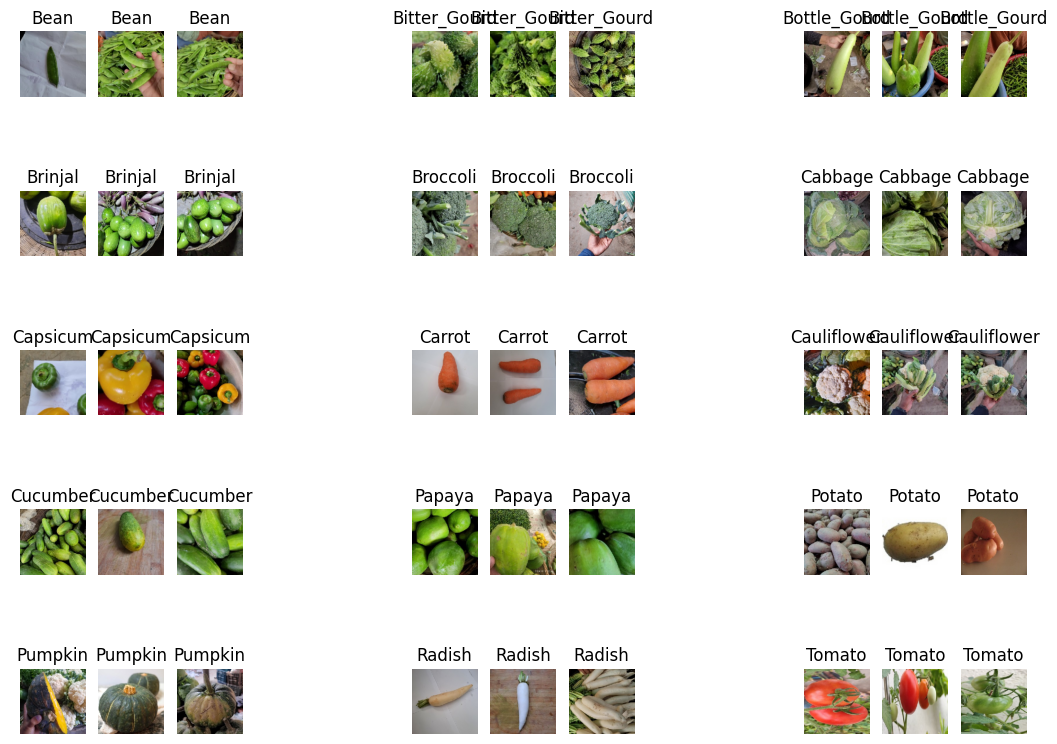

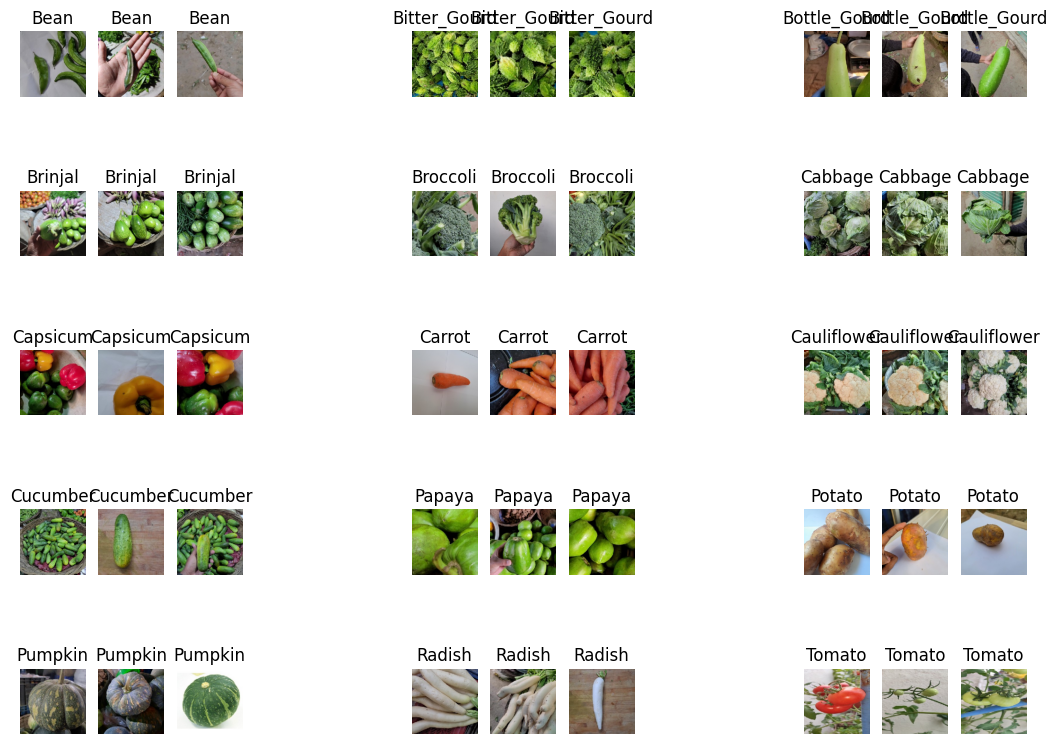

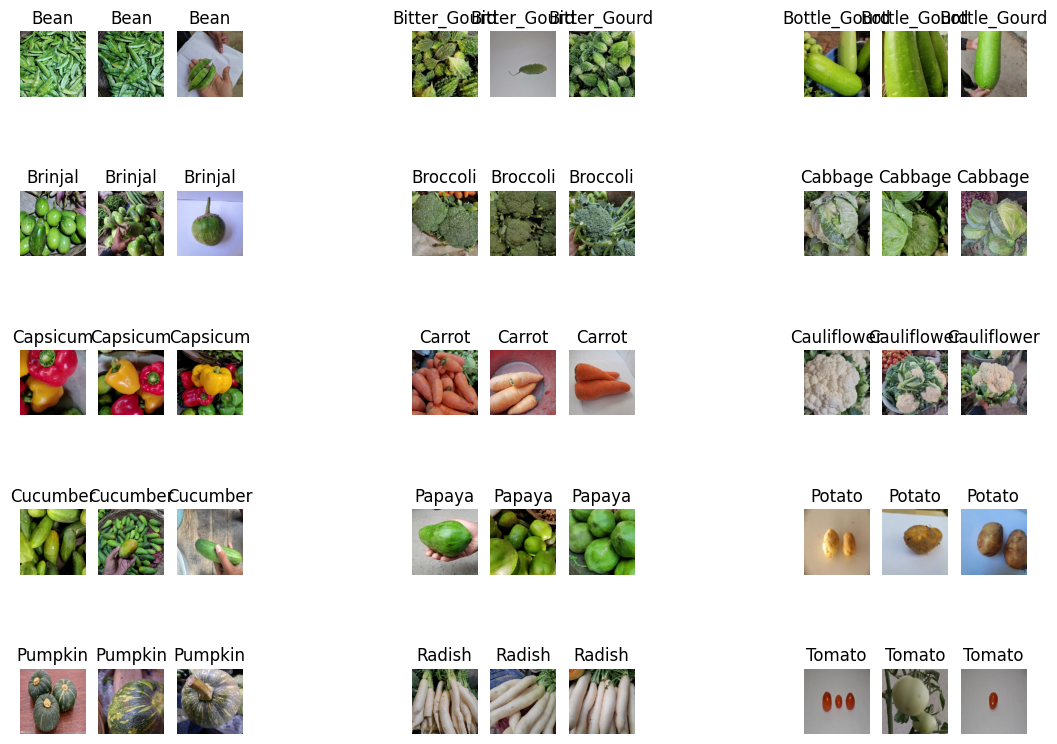

In [ ]:
import os
import random
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras.preprocessing.image import load_img, img_to_array

# Define the paths to your train, test, and validation datasets
train_dir = '/content/Vegetable Images/train'
test_dir = '/content/Vegetable Images/test'
validation_dir = '/content/Vegetable Images/validation'

# Get the class names from subdirectories in the train directory
class_names = sorted(os.listdir(train_dir))
num_classes = len(class_names)

# Print the number of classes and their names
print(f"Number of classes: {num_classes}")
print("Class names:")
for class_name in class_names:
    print(class_name)

# Function to display 5 random images from a directory with labels
def display_random_images(directory):
    plt.figure(figsize=(15, 10))
    for i, class_name in enumerate(class_names):
        class_dir = os.path.join(directory, class_name)
        image_files = os.listdir(class_dir)
        random_images = random.sample(image_files, 3)

        for j, image_file in enumerate(random_images):
            img_path = os.path.join(class_dir, image_file)
            img = load_img(img_path, target_size=(150, 150))
            img_array = img_to_array(img)
            plt.subplot(5, num_classes, i * 5 + j + 1)
            plt.imshow(img_array / 255.0)  # Normalize pixel values to [0, 1]
            plt.title(class_name)
            plt.axis('off')

# Display 5 random images from each of the train, test, and validation directories
display_random_images(train_dir)
display_random_images(test_dir)
display_random_images(validation_dir)

plt.show()


In [ ]:
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# Define the paths to your train, test, and validation datasets
train_dir = '/content/Vegetable Images/train'
test_dir = '/content/Vegetable Images/test'
validation_dir = '/content/Vegetable Images/validation'

# Define image size and batch size
image_size = (150, 150)
batch_size = 32

# Create an ImageDataGenerator for preprocessing
train_datagen = ImageDataGenerator(
    rescale=1.0/255.0,  # Rescale pixel values to [0, 1]
)

# Create data generators for train, test, and validation sets
train_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size=image_size,
    batch_size=batch_size,
    class_mode='categorical'  # If you have categorical labels
)

test_datagen = ImageDataGenerator(rescale=1.0/255.0)

test_generator = test_datagen.flow_from_directory(
    test_dir,
    target_size=image_size,
    batch_size=batch_size,
    class_mode='categorical'
)

validation_datagen = ImageDataGenerator(rescale=1.0/255.0)

validation_generator = validation_datagen.flow_from_directory(
    validation_dir,
    target_size=image_size,
    batch_size=batch_size,
    class_mode='categorical'
)

# You can now use these generators for training your model


Found 15000 images belonging to 15 classes.
Found 3000 images belonging to 15 classes.
Found 3000 images belonging to 15 classes.


87910968/87910968 [==============================] - 1s 0us/step


Epoch 1/10
468/468 [==============================] - ETA: 0s - loss: 0.3363 - accuracy: 0.9219
Epoch 1: val_loss improved from inf to 0.08621, saving model to best_model.h5
468/468 [==============================] - 994s 2s/step - loss: 0.3363 - accuracy: 0.9219 - val_loss: 0.0862 - val_accuracy: 0.9745 - lr: 0.0010
Epoch 2/10
468/468 [==============================] - ETA: 0s - loss: 0.0649 - accuracy: 0.9796
Epoch 2: val_loss did not improve from 0.08621
468/468 [==============================] - 963s 2s/step - loss: 0.0649 - accuracy: 0.9796 - val_loss: 0.1192 - val_accuracy: 0.9624 - lr: 0.0010
Epoch 3/10
468/468 [==============================] - ETA: 0s - loss: 0.0429 - accuracy: 0.9863
Epoch 3: val_loss improved from 0.08621 to 0.07600, saving model to best_model.h5
468/468 [==============================] - 971s 2s/step - loss: 0.0429 - accuracy: 0.9863 - val_loss: 0.0760 - val_accuracy: 0.9795 - lr: 0.0010
Epoch 4/10
468/468 [==============================] - ETA: 0s - loss: 

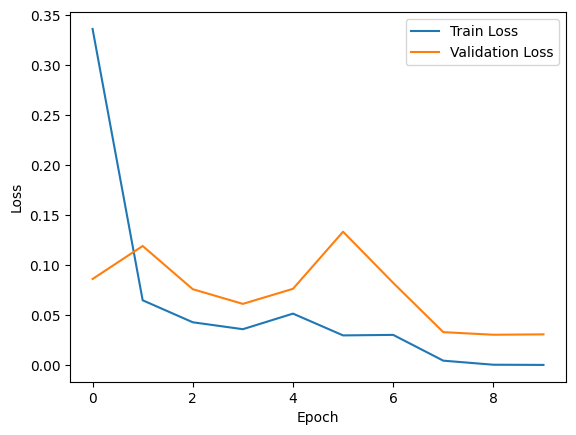

In [ ]:
import tensorflow as tf
from tensorflow.keras.applications import InceptionV3
from tensorflow.keras.layers import Dense, GlobalAveragePooling2D
from tensorflow.keras.models import Model
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import ModelCheckpoint, EarlyStopping, ReduceLROnPlateau


# Load the pre-trained InceptionV3 model with weights from ImageNet
base_model = InceptionV3(weights='imagenet', include_top=False)

# Add custom layers for your classification task
x = base_model.output
x = GlobalAveragePooling2D()(x)
x = Dense(1024, activation='relu')(x)
predictions = Dense(num_classes, activation='softmax')(x)  # num_classes is the number of classes in your dataset

# Create the final model for fine-tuning
model = Model(inputs=base_model.input, outputs=predictions)

# Freeze the layers of the base model (optional)
for layer in base_model.layers:
    layer.trainable = False

# Compile the model
model.compile(optimizer=Adam(lr=0.0001), loss='categorical_crossentropy', metrics=['accuracy'])

# Create data generators for train, test, and validation sets (as previously defined)

# Define callbacks for monitoring during training
model_checkpoint = ModelCheckpoint('best_model.h5', save_best_only=True, save_weights_only=False, monitor='val_loss', mode='min', verbose=1)
early_stopping = EarlyStopping(monitor='val_loss', patience=5, mode='min', verbose=1)
reduce_lr = ReduceLROnPlateau(monitor='val_loss', factor=0.2, patience=3, min_lr=0.00001, mode='min', verbose=1)

# Train the model
history = model.fit(
    train_generator,
    steps_per_epoch=train_generator.samples // batch_size,
    validation_data=validation_generator,
    validation_steps=validation_generator.samples // batch_size,
    epochs=10,  # Adjust the number of epochs as needed
    callbacks=[model_checkpoint, early_stopping, reduce_lr]
)

# Evaluate the model on the test set
test_loss, test_accuracy = model.evaluate(test_generator, steps=test_generator.samples // batch_size)

print(f'Test accuracy: {test_accuracy}')

# You can save the model for later use if desired
model.save('inceptionv3_vegetable_classification.h5')

# Plot training and validation loss
import matplotlib.pyplot as plt

plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()


In [ ]:
import numpy as np

# Load the saved model (if not loaded already)
model = tf.keras.models.load_model('inceptionv3_vegetable_classification.h5')

# Create a generator for validation data
validation_datagen = ImageDataGenerator(rescale=1.0/255.0)

validation_generator = validation_datagen.flow_from_directory(
    validation_dir,
    target_size=image_size,
    batch_size=batch_size,
    class_mode='categorical',
    shuffle=False  # Set to False to ensure predictions are in the same order as the data
)

# Predict labels for validation data
validation_predictions = model.predict(validation_generator, steps=validation_generator.samples // batch_size, verbose=1)

# Get the true labels
true_labels = validation_generator.classes

# Convert predicted probabilities to class labels
predicted_labels = np.argmax(validation_predictions, axis=1)

# Print the first few true labels and predicted labels
print("True Labels:", true_labels[:10])
print("Predicted Labels:", predicted_labels[:10])

# You can then compare the true labels and predicted labels for validation data
# and calculate evaluation metrics if needed (e.g., accuracy, confusion matrix).


Found 3000 images belonging to 15 classes.
93/93 [==============================] - 152s 2s/step
True Labels: [0 0 0 0 0 0 0 0 0 0]
Predicted Labels: [0 0 0 0 0 0 0 0 0 0]


Found 3000 images belonging to 15 classes.
93/93 [==============================] - 153s 2s/step


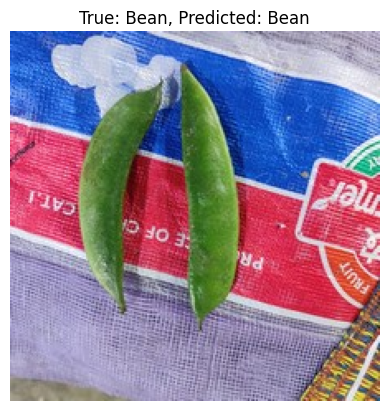

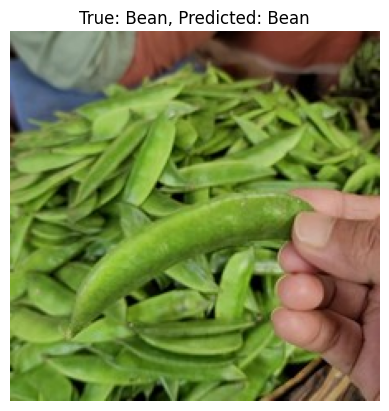

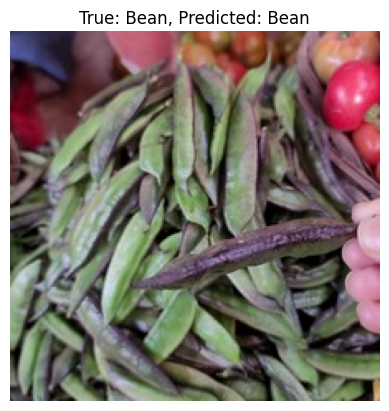

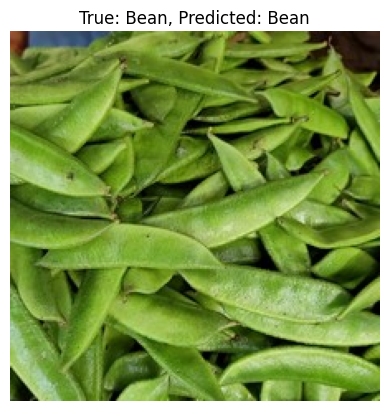

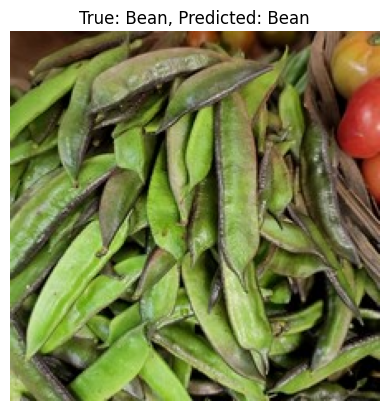

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Load the saved model (if not loaded already)
model = tf.keras.models.load_model('inceptionv3_vegetable_classification.h5')

# Create a generator for validation data
validation_datagen = ImageDataGenerator(rescale=1.0/255.0)

validation_generator = validation_datagen.flow_from_directory(
    validation_dir,
    target_size=image_size,
    batch_size=batch_size,
    class_mode='categorical',
    shuffle=False  # Set to False to ensure predictions are in the same order as the data
)

# Predict labels for validation data
validation_predictions = model.predict(validation_generator, steps=validation_generator.samples // batch_size, verbose=1)

# Get the true labels
true_labels = validation_generator.classes

# Convert predicted probabilities to class labels
predicted_labels = np.argmax(validation_predictions, axis=1)

# Get the file paths of validation images
file_paths = validation_generator.filepaths

# Display the first few images along with true and predicted labels
num_images_to_display = 5

for i in range(num_images_to_display):
    img = plt.imread(file_paths[i])
    true_label = class_names[true_labels[i]]
    predicted_label = class_names[predicted_labels[i]]

    plt.imshow(img)
    plt.title(f"True: {true_label}, Predicted: {predicted_label}")
    plt.axis('off')
    plt.show()
